In [1]:
breakpoint()
# Importaciones
import unittest
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %% [markdown]
# ## Algoritmia
# ### Práctica 10
# En esta práctica se trabaja con árboles de búsqueda óptimos y el método de programación dinámica para su obtención.
# 
# En el cuerpo de cada función o método a implementar hay una instrucción "pass", se debe sustituir por la implementación adecuada. La implementación debe ser propia, sin incluir código ajeno o realizado conjuntamente. No se debe modificar el resto del código proporcionado.
# 
# Para cada clase o función que se pide se proporcionan algunos tests. Las implementaciones deberían superar estos tests.


 ## Preámbulo
 No se puede importar de otros módulos, salvo que se consulte previamente con el profesor

In [3]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %% [markdown]
# ## Algoritmia
# ### Práctica 10
# En esta práctica se trabaja con árboles de búsqueda óptimos y el método de programación dinámica para su obtención.
# 
# En el cuerpo de cada función o método a implementar hay una instrucción "pass", se debe sustituir por la implementación adecuada. La implementación debe ser propia, sin incluir código ajeno o realizado conjuntamente. No se debe modificar el resto del código proporcionado.
# 
# Para cada clase o función que se pide se proporcionan algunos tests. Las implementaciones deberían superar estos tests.


 ## Preámbulo
 No se puede importar de otros módulos, salvo que se consulte previamente con el profesor

 ## Algoritmia
 ### Práctica 10
 En esta práctica se trabaja con árboles de búsqueda óptimos y el método de programación dinámica para su obtención.

 En el cuerpo de cada función o método a implementar hay una instrucción "pass", se debe sustituir por la implementación adecuada. La implementación debe ser propia, sin incluir código ajeno o realizado conjuntamente. No se debe modificar el resto del código proporcionado.

 Para cada clase o función que se pide se proporcionan algunos tests. Las implementaciones deberían superar estos tests.

 ## Preámbulo
 No se puede importar de otros módulos, salvo que se consulte previamente con el profesor

In [4]:
# Importaciones
import unittest
import networkx as nx
import matplotlib.pyplot as plt


 ## Clase `ArbolBusquedaOptimo`

In [5]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])
        
    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            clave = "k"+str(self.raiz())
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = "k"+str(self.raiz())
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = "k"+str(self.raiz())
        c = self.claves
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


 ### Dibujo de los árboles

['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]


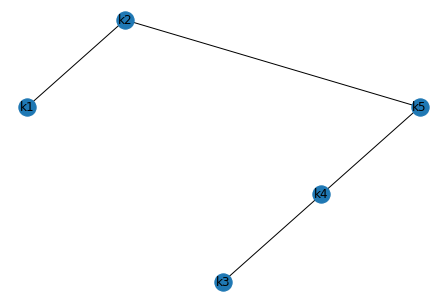

In [6]:
arbol = ArbolBusquedaOptimo(
    ["k1", "k2", "k3", "k4", "k5"], 
    [0.15, 0.10, 0.05, 0.10, 0.20], 
    [0.05, 0.10, 0.05, 0.05, 0.05, 0.10])

arbol.dibuja()



['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


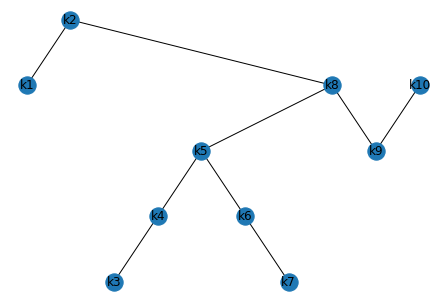

In [7]:
arbol = ArbolBusquedaOptimo(
    ["k" + str(i) for i in range(1, 11)], 
    [0.21, 0.2, 0.04, 0.06, 0.08, 0.04, 0.04, 0.11, 0.19, 0.03])   

arbol.dibuja()


 ### Tests para la clase `ArbolBusquedaOptimo`

In [8]:
class TestArbolBusquedaOptimo(unittest.TestCase):
    """Tests para la clase ArbolBusquedaOptimo"""
    
    def test_arbol_busqueda_1(self):
        """Tests para la clase ArbolBusquedaOptimo"""
        
        claves = ["k1", "k2", "k3", "k4", "k5"]
        arbol = ArbolBusquedaOptimo(
            claves, [0.15, 0.10, 0.05, 0.10, 0.20], 
            [0.05, 0.10, 0.05, 0.05, 0.05, 0.10])
       
        self.assertEqual(len(arbol), 5)
                              
        for clave in claves:
            self.assertTrue(clave in arbol)
        self.assertTrue("k0" not in arbol)
        self.assertTrue("k6" not in arbol)
        
        for i, clave in enumerate(claves):
            self.assertEqual(arbol[i], clave)
        
        for i, clave in enumerate(arbol):
            self.assertEqual(claves[i], clave)
            
        self.assertEqual(arbol.raiz(), "k2")
        
        self.assertEqual(arbol.profundidad(), 3)
        profundidades = [1, 0, 3, 2, 1]
        for clave, profundidad in zip(claves, profundidades):
            self.assertEqual(arbol.profundidad(clave), profundidad)
            
        lista_hijos = [(None, None), ("k1", "k5"), (None, None), ("k3", None), 
                 ("k4", None)]
        for clave, hijos in zip(claves, lista_hijos):
            self.assertEqual(arbol.hijos(clave), hijos)
            
        self.assertEqual(round(arbol.coste_esperado(), 2), 2.75)
        costes = [ 0.45, 2.75, 0.25, 0.60, 1.30]
        for clave, coste in zip(claves, costes):
            self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
            
        self.assertEqual(str(arbol), "((k1)k2(((k3)k4)k5))")
        
    def test_arbol_busqueda_2(self):
        """Tests para la clase ArbolBusquedaOptimo"""
        
        claves = ["k" + str(i) for i in range(1, 11)]
        arbol = ArbolBusquedaOptimo(
            claves, 
            [0.21, 0.2, 0.04, 0.06, 0.08, 0.04, 0.04, 0.11, 0.19, 0.03])
    
        self.assertEqual(len(arbol), 10)
                              
        for clave in claves:
            assert clave in arbol
        assert "k0" not in arbol
        assert "k11" not in arbol
        
        for i, clave in enumerate(claves):
            self.assertEqual(arbol[i], clave)
        
        for i, clave in enumerate(arbol):
            self.assertEqual(claves[i], clave)
            
        self.assertEqual(arbol.raiz(), "k2")
        
        self.assertEqual(arbol.profundidad(), 4)
        profundidades = [1, 0, 4, 3, 2, 3, 4, 1, 2, 3]
        for clave, profundidad in zip(claves, profundidades):
            self.assertEqual(arbol.profundidad(clave), profundidad)
        
        lista_hijos = [(None, None), ('k1', 'k8'), (None, None), ('k3', None), 
                       ('k4', 'k6'), (None, 'k7'), (None, None), ('k5', 'k9'), 
                       (None, 'k10'), (None, None)]
        for clave, hijos in zip(claves, lista_hijos):
            self.assertEqual(arbol.hijos(clave), hijos)
            
        self.assertEqual(round(arbol.coste_esperado(), 2), 2.57)
        costes = [0.21, 2.57, 0.04, 0.14, 0.52, 0.12, 0.04, 1.36, 0.25, 0.03]
        for clave, coste in zip(claves, costes):
            self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
    
        self.assertEqual(str(arbol), "((k1)k2((((k3)k4)k5(k6(k7)))k8(k9(k10))))")


 ## Ejecución de tests

In [9]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



EE['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ERROR: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
  File "<ipython-input-5-65699a8dcfe0>", line 123, in profundidad
    t = int(clave[1])
ValueError: invalid literal for int() with base 10: 'k'

ERROR: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
  File "<ipython-input-5-65699a8dcfe0>", line 123, 

In [10]:
breakpoint()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
E['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
E
ERROR: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
  File "<ipython-input-5-65699a8dcfe0>", line 123, in profundidad
    t = int(clave[1])
ValueError: invalid literal for int() with base 10: 'k'

ERROR: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
  File "<ipython-input-5-65699a8dcfe0>", line 123, 

In [11]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])
        
    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.claves
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [12]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



FF['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
AssertionError: 0 != 3

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
AssertionError: 0 != 4

----------------------------------------------------------------------
Ran 2 tests in 0.007s

FAILED (failures=2)


In [13]:
breakpoint()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
FF['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
AssertionError: 0 != 3

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
AssertionError: 0 != 4

----------------------------------------------------------------------
Ran 2 tests in 49.917s

FAILED (failures=2)


In [14]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        localLevel = level

        derLevel=nodes[:auxIndex]
        izqLevel=nodes[auxIndex+1:]

        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.claves
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [15]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



FF['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
AssertionError: [3, 4, 5] != 3

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
AssertionError: [3, 4, 5, 6, 7, 8, 9, 10] != 4

----------------------------------------------------------------------
Ran 2 tests in 0.009s

FAILED (failures=2)


In [16]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], level)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], level)

        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.claves
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [17]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



EE['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ERROR: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
  File "<ipython-input-16-c39a03cff43d>", line 137, in profundidad
    return self.profundidadArbol(self.nodos, 0)
  File "<ipython-input-16-c39a03cff43d>", line 122, in profundidadArbol
    izqLevel=self.profundidadArbol(nodes[auxIndex+1:], level)
  File "<ipython-input-16-c39a03cff43d>", line 121, in profundidadArbol
    derLevel=self.profundidadArbol(nodes[:auxIndex], level)
  File "<ipython-input-16-c39a03cff43d>", line 124, in profundidadArbol
    if derLevel>izqLevel:
TypeError: '>' not supported between instances 

In [18]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], level)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], level)

        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.claves
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [19]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



EE['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ERROR: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
  File "<ipython-input-18-cee24fc49de2>", line 137, in profundidad
    return self.profundidadArbol(self.nodos, 0)
  File "<ipython-input-18-cee24fc49de2>", line 122, in profundidadArbol
    izqLevel=self.profundidadArbol(nodes[auxIndex+1:], level)
  File "<ipython-input-18-cee24fc49de2>", line 121, in profundidadArbol
    derLevel=self.profundidadArbol(nodes[:auxIndex], level)
  File "<ipython-input-18-cee24fc49de2>", line 124, in profundidadArbol
    if derLevel>izqLevel:
TypeError: '>' not supported between instances 

In [20]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], level)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], level)

        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.claves
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [21]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



FF['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
AssertionError: 1 != 3

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
AssertionError: 1 != 4

----------------------------------------------------------------------
Ran 2 tests in 0.009s

FAILED (failures=2)


In [22]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:])
        localLevel = level+1

        derLevel=self.profundidadArbol(nodes[:auxIndex], level)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], level)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.claves
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


SyntaxError: invalid syntax (<ipython-input-22-fd79f7dcc7da>, line 119)

In [23]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



FF['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
AssertionError: 1 != 3

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
AssertionError: 1 != 4

----------------------------------------------------------------------
Ran 2 tests in 0.007s

FAILED (failures=2)


In [24]:
breakpoint()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
FF['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
AssertionError: 1 != 3

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
AssertionError: 1 != 4

----------------------------------------------------------------------
Ran 2 tests in 25.293s

FAILED (failures=2)


In [25]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:])
        localLevel = level+1

        derLevel=self.profundidadArbol(nodes[:auxIndex], level)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], level)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.claves
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


SyntaxError: invalid syntax (<ipython-input-25-fd79f7dcc7da>, line 119)

In [26]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:]):
            localLevel = level+1

        derLevel=self.profundidadArbol(nodes[:auxIndex], level)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], level)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.claves
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [27]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



FF['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
AssertionError: 1 != 3

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
AssertionError: 1 != 4

----------------------------------------------------------------------
Ran 2 tests in 0.008s

FAILED (failures=2)


In [28]:
breakpoint()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
FF['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
AssertionError: 1 != 3

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
AssertionError: 1 != 4

----------------------------------------------------------------------
Ran 2 tests in 43.574s

FAILED (failures=2)


In [29]:
breakpoint()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
FF['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
AssertionError: 1 != 3

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
AssertionError: 1 != 4

----------------------------------------------------------------------
Ran 2 tests in 70.578s

FAILED (failures=2)


In [30]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:]):
            localLevel = level+1
        else:
            localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], level)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], level)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.claves
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [31]:
breakpoint()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
FF['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
AssertionError: 1 != 3

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
AssertionError: 1 != 4

----------------------------------------------------------------------
Ran 2 tests in 18.591s

FAILED (failures=2)


In [32]:
breakpoint()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
FF['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 27, in test_arbol_busqueda_1
    self.assertEqual(arbol.profundidad(), 3)
AssertionError: 1 != 3

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 67, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(), 4)
AssertionError: 1 != 4

----------------------------------------------------------------------
Ran 2 tests in 20.876s

FAILED (failures=2)


In [33]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:]):
            localLevel = level+1
        else:
            localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], localLevel)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], localLevel)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.claves
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [34]:
breakpoint()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
.F['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 70, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(clave), profundidad)
AssertionError: 1 != 3

----------------------------------------------------------------------
Ran 2 tests in 6.053s

FAILED (failures=1)


In [35]:
breakpoint()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



.['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
F
FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 70, in test_arbol_busqueda_2
    self.assertEqual(arbol.profundidad(clave), profundidad)
AssertionError: 1 != 3

----------------------------------------------------------------------
Ran 2 tests in 378.124s

FAILED (failures=1)


In [36]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:]):
            localLevel = level+1
        else:
            localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], localLevel)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], localLevel)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1:])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1:])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.claves
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [37]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



.F['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 78, in test_arbol_busqueda_2
    self.assertEqual(round(arbol.coste_esperado(), 2), 2.57)
AssertionError: 2.45 != 2.57

----------------------------------------------------------------------
Ran 2 tests in 0.009s

FAILED (failures=1)


In [38]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:]):
            localLevel = level+1
        else:
            localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], localLevel)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], localLevel)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1:])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1:])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.nodos
        r = int(self.raiz()[1])
        rSub = self.root[int(min(c)[1])][int(max(c)[1])]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[int(min(c)[1])][int(max(c)[1])]
                iRSub = c.index("k"+str(rSub))
            else:
                cost = self.e[int(min(c)[1])][int(max(c)[1])]
        return self.e[int(min(c)[1])][int(max(c)[1])]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [39]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:]):
            localLevel = level+1
        else:
            localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], localLevel)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], localLevel)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1:])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1:])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.nodos
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index("k"+str(rSub))
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index("k"+str(rSub))
        return self.e[min(c)][max(c)]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [40]:
breakpoint()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



E['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
E
ERROR: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 37, in test_arbol_busqueda_1
    self.assertEqual(round(arbol.coste_esperado(), 2), 2.75)
  File "<ipython-input-39-bda0575b5db3>", line 249, in coste_esperado
    iRSub = c.index("k"+str(rSub))
ValueError: 'k2' is not in list

ERROR: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 78, in test_arbol_busqueda_2
    self.assertEqual(round(arbol.coste_esperado(), 2), 2.57)
  File "<ipython-input-39-

In [41]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:]):
            localLevel = level+1
        else:
            localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], localLevel)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], localLevel)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1:])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1:])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.nodos
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index("k"+str(rSub))
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index("k"+str(rSub))
        return self.e[min(c)][max(c)]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [42]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



EE['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ERROR: test_arbol_busqueda_1 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 40, in test_arbol_busqueda_1
    self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
  File "<ipython-input-41-c0f7a58716b5>", line 255, in coste_esperado
    iRSub = c.index("k"+str(rSub))
ValueError: 'k1' is not in list

ERROR: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 81, in test_arbol_busqueda_2
    self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
  File "<ipyth

In [43]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:]):
            localLevel = level+1
        else:
            localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], localLevel)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], localLevel)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1:])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1:])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.nodos
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
        return self.e[min(c)][max(c)]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [44]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



.F['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 81, in test_arbol_busqueda_2
    self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
AssertionError: 0.21 != 0.03

----------------------------------------------------------------------
Ran 2 tests in 0.009s

FAILED (failures=1)


In [45]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:]):
            localLevel = level+1
        else:
            localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], localLevel)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], localLevel)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1:])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1:])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.nodos
        r = int(self.raiz()[1:])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
        return self.e[min(c)][max(c)]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [46]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



.F['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 81, in test_arbol_busqueda_2
    self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
AssertionError: 0.21 != 0.03

----------------------------------------------------------------------
Ran 2 tests in 0.007s

FAILED (failures=1)


In [47]:
# Importaciones
import unittest
import networkx as nx
import matplotlib.pyplot as plt


In [48]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:]):
            localLevel = level+1
        else:
            localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], localLevel)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], localLevel)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1:])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1:])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        r = int(self.raiz()[1])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.nodos
        r = int(self.raiz()[1:])
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
        return self.e[min(c)][max(c)]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [49]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



.F['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 81, in test_arbol_busqueda_2
    self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
AssertionError: 0.21 != 0.03

----------------------------------------------------------------------
Ran 2 tests in 0.008s

FAILED (failures=1)


In [50]:
breakpoint()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



.['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
F
FAIL: test_arbol_busqueda_2 (__main__.TestArbolBusquedaOptimo)
Tests para la clase ArbolBusquedaOptimo
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-8-cc11761470cd>", line 81, in test_arbol_busqueda_2
    self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
AssertionError: 0.21 != 0.03

----------------------------------------------------------------------
Ran 2 tests in 91.239s

FAILED (failures=1)


In [51]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:]):
            localLevel = level+1
        else:
            localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], localLevel)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], localLevel)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1:])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1:])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.nodos
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1:])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
        return self.e[min(c)][max(c)]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


In [52]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



..['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

----------------------------------------------------------------------
Ran 2 tests in 0.007s

OK


 ## Algoritmia
 ### Práctica 10
 En esta práctica se trabaja con árboles de búsqueda óptimos y el método de programación dinámica para su obtención.

 En el cuerpo de cada función o método a implementar hay una instrucción "pass", se debe sustituir por la implementación adecuada. La implementación debe ser propia, sin incluir código ajeno o realizado conjuntamente. No se debe modificar el resto del código proporcionado.

 Para cada clase o función que se pide se proporcionan algunos tests. Las implementaciones deberían superar estos tests.

 ## Preámbulo
 No se puede importar de otros módulos, salvo que se consulte previamente con el profesor

In [53]:
# Importaciones
import unittest
import networkx as nx
import matplotlib.pyplot as plt


 ## Clase `ArbolBusquedaOptimo`

In [54]:
class ArbolBusquedaOptimo:
    """
    Clase para árboles de búsquedas construidos a partir de las probabilidades
    de búsqueda de sus claves y pseudoclaves.
    Las pseudoclaves representan las búsquedas de elementos que no están en el
    árbol.
    """
    
    def __init__(self, claves, probab_claves, probab_pseudo = None):
        """
        Constructor a partir de una secuencia con las claves, sus probabilidades 
        y las probabilidades de buscar elementos que no están.
        La longitud de claves y probab_claves tiene que ser la misma.
        Si probab_pseudo es None no se tienen en cuentas las búsquedas de 
        elementos que no están.
        Si prabab_pseudo no es None, su longitud debe ser la de claves más 1.
        """
        self.claves=claves
        self.probab_claves=probab_claves
        n=len(claves)
        self.n=n 
        print(claves)
        self.probab_pseudo=probab_pseudo
        INF=999
        e=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        w=[[0 for i in range(0,n+1)]for j in range(0,n+2)]
        raiz=[[None for i in range(0,n+1)]for j in range(0,n+1)]    
        probab_claves.insert(0,0)
        indorden=[]
        self.nodos= [ i for i in range(1,n+1)]
        self.inorden=indorden
        if probab_pseudo is not None:
            for i in range(1,n+2):
                e[i][i-1]=probab_pseudo[i-1]
                w[i][i-1]=probab_pseudo[i-1]

        
        for l in range(1,n+1):
            for i in range(1,n-l+2):
                j=i+l-1
                e[i][j]=INF
                w[i][j]=w[i][j-1]+probab_claves[j]+probab_pseudo[j] if probab_pseudo is not None else w[i][j-1]+probab_claves[j]
                for r in range(i,j+1):
                    t=e[i][r-1]+e[r+1][j]+w[i][j]
                    if t < e[i][j]:
                        e[i][j]=t
                        raiz[i][j]=r
                        if i==j:
                            indorden.append(r)
        print(indorden)
        self.e = e
        self.root=raiz
        self.w=w
      
    def __str__(self, clave=None):
        """
        Devuelve una cadena con una representación del árbol.
        Si clave es distinto de None se obtiene la cadena para el subárbol con
        clave como raíz.
        La cadena correspondiente a un nodo con dos hijos es 
        "(" + str(subarbol_izq) + str(clave) + str(subarbol_der) + ")".
        Para un subárbol vacío la cadena correspondiente es vacía.
        Por ejemplo, un nodo hoja se representa como "(" + str(clave) + ")".
        """
        
        if clave == None:
            clave = "k"+str(self.raiz())
        return self.getString(clave,self.nodos)
    def getString(self, target, nodes):
        
        
        if len(nodes) == 1:
            return "("+"k"+str(nodes[0])+")"
        if len(nodes)==0:
            return None

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        string=""
        derArr=nodes[:auxIndex]
        izqArr=nodes[auxIndex+1:]
        string+="("
        if len(derArr)!=0:
            string += self.getString(target,derArr)
        string+="k"+str(newRoot)
        if len(izqArr)!=0:
            string += self.getString(target,izqArr)
        string+=")"
        return string

    def __len__(self):
        """Número de claves en el árbol."""
        
        return len(self.claves)
        
    def __contains__(self, clave):
        """Indica si una clave está en el árbol."""
        
        return clave in self.claves
    
    def __getitem__(self, i):
        """Devuelve la clave i-ésima."""
        
        return self.claves[i]

    def raiz(self):
        """Devuelve la clave de la raíz del árbol.""" 
        
        return "k"+str(self.root[1][self.n])

    def profundidadArbol(self, nodes, level):
        if len(nodes) == 1:
            return level + 1
        if len(nodes)==0:
            return 0

        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        if newRoot != int(self.raiz()[1:]):
            localLevel = level+1
        else:
            localLevel = level

        derLevel=self.profundidadArbol(nodes[:auxIndex], localLevel)
        izqLevel=self.profundidadArbol(nodes[auxIndex+1:], localLevel)
        if derLevel>izqLevel:
            rLevel = derLevel
        else:
            rLevel = izqLevel
        return rLevel

    def profundidad(self, clave=None):
        """
        Devuelve la profundidad del árbol si clave es None, si no devuelve la 
        profundidad de la clave. 
        Si la clave no está devuelve None.
        """
        if clave == None:
            return self.profundidadArbol(self.nodos, 0)
        c = [ int(i[1:]) for i in self.claves]
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1:])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            else:
                cost = self.e[min(c)][max(c)]
        return level


    def get_sons(self, root, target, nodes):
        if len(nodes) == 1:
            if int(target[1]) == nodes[0]:
                return "k"+str(nodes[0]), (None, None)
            else:
                return "k"+str(nodes[0]),"k"+str(nodes[0])
        if len(nodes)==0:
            return None, (None,None)
        newRoot=self.root[min(nodes)][max(nodes)]
        auxIndex= nodes.index(newRoot)
        izq, target1 = self.get_sons(newRoot,target,nodes[:auxIndex])
        der, target2 = self.get_sons(newRoot,target,nodes[auxIndex+1:])
        if newRoot == self.raiz():
            if target == "k"+str(self.raiz()):
                return izq,der
            if target < "k"+str(self.raiz()):
                return target1
            return target2
            
        if ("k"+str(newRoot)) == target:
            return (izq,der), (izq,der)
     
        if target < "k"+str(self.raiz()):
            return ("k"+str(newRoot)),target2
        return ("k"+str(newRoot)),target1

    def hijos(self, clave=None):
        """
        Devuelve un par con las claves del hijo izquierdo y derecho.
        Si el argumento clave es None devuelve los hijos de la raíz.
        En el resultado, None indica que no tiene ese hijo.
        """
     
        # if clave==None:
        #     clave = self.raiz()
        # claves=self.get_sons(self.raiz(), clave, self.nodos)
        # return claves
        if clave == None:
            clave = self.raiz()
        c = [ int(i[1:]) for i in self.claves]
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        derArr = c[:iRSub]
        izqArr = c[iRSub+1:]
        t = int(clave[1:])
        level= 0
        while rSub != t:
            level+=1
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
                derArr = c[:iRSub]
                izqArr = c[iRSub+1:]
        if len(izqArr) == 0: 
            izq = None
        else:
            izq = self.root[min(izqArr)][max(izqArr)]
            izq = "k"+str(izq)

        if len(derArr) == 0: 
            der = None
        else:
            der = self.root[min(derArr)][max(derArr)]
            der = "k"+str(der)
        
        return der,izq
        


    def coste_esperado(self, clave=None):
        """
        Devuelve el coste esperado de la búsqueda en el subárbol asociado a una
        clave.
        Si clave es None devuelve el coste del árbol completo.
        """
        if clave == None:
            clave = self.raiz()
        c = self.nodos
        rSub = self.root[min(c)][max(c)]
        iRSub = c.index(rSub)
        t = int(clave[1:])
        while rSub != t:
            if rSub > t:
                c=c[:iRSub]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
            elif rSub < t:
                c=c[iRSub+1:]
                rSub = self.root[min(c)][max(c)]
                iRSub = c.index(rSub)
        return self.e[min(c)][max(c)]
    def dibuja(self):
        """Dibujo del árbol."""
        
        grafo = nx.Graph()
        if self.__len__() is None:
            return
        for c in self:
            grafo.add_node(c)
        for c in self:
            izq, der = self.hijos(c)
            for hijo in (izq, der):
                if hijo is not None:
                    grafo.add_edge(c, hijo)
        pos = {c: (i, -self.profundidad(c)) for i, c in enumerate(self)}
        nx.draw(grafo, with_labels = True, pos = pos)
        plt.show()


 ### Dibujo de los árboles

['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]


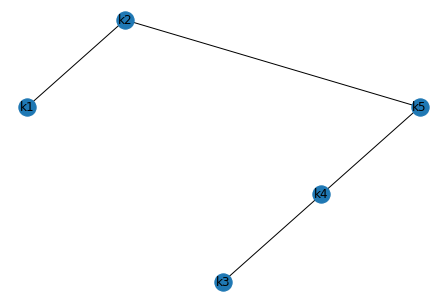

In [55]:
arbol = ArbolBusquedaOptimo(
    ["k1", "k2", "k3", "k4", "k5"], 
    [0.15, 0.10, 0.05, 0.10, 0.20], 
    [0.05, 0.10, 0.05, 0.05, 0.05, 0.10])

arbol.dibuja()



['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


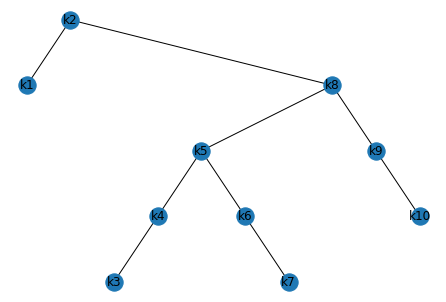

In [56]:
arbol = ArbolBusquedaOptimo(
    ["k" + str(i) for i in range(1, 11)], 
    [0.21, 0.2, 0.04, 0.06, 0.08, 0.04, 0.04, 0.11, 0.19, 0.03])   

arbol.dibuja()


 ### Tests para la clase `ArbolBusquedaOptimo`

In [57]:
class TestArbolBusquedaOptimo(unittest.TestCase):
    """Tests para la clase ArbolBusquedaOptimo"""
    
    def test_arbol_busqueda_1(self):
        """Tests para la clase ArbolBusquedaOptimo"""
        
        claves = ["k1", "k2", "k3", "k4", "k5"]
        arbol = ArbolBusquedaOptimo(
            claves, [0.15, 0.10, 0.05, 0.10, 0.20], 
            [0.05, 0.10, 0.05, 0.05, 0.05, 0.10])
       
        self.assertEqual(len(arbol), 5)
                              
        for clave in claves:
            self.assertTrue(clave in arbol)
        self.assertTrue("k0" not in arbol)
        self.assertTrue("k6" not in arbol)
        
        for i, clave in enumerate(claves):
            self.assertEqual(arbol[i], clave)
        
        for i, clave in enumerate(arbol):
            self.assertEqual(claves[i], clave)
            
        self.assertEqual(arbol.raiz(), "k2")
        
        self.assertEqual(arbol.profundidad(), 3)
        profundidades = [1, 0, 3, 2, 1]
        for clave, profundidad in zip(claves, profundidades):
            self.assertEqual(arbol.profundidad(clave), profundidad)
            
        lista_hijos = [(None, None), ("k1", "k5"), (None, None), ("k3", None), 
                 ("k4", None)]
        for clave, hijos in zip(claves, lista_hijos):
            self.assertEqual(arbol.hijos(clave), hijos)
            
        self.assertEqual(round(arbol.coste_esperado(), 2), 2.75)
        costes = [ 0.45, 2.75, 0.25, 0.60, 1.30]
        for clave, coste in zip(claves, costes):
            self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
            
        self.assertEqual(str(arbol), "((k1)k2(((k3)k4)k5))")
        
    def test_arbol_busqueda_2(self):
        """Tests para la clase ArbolBusquedaOptimo"""
        
        claves = ["k" + str(i) for i in range(1, 11)]
        arbol = ArbolBusquedaOptimo(
            claves, 
            [0.21, 0.2, 0.04, 0.06, 0.08, 0.04, 0.04, 0.11, 0.19, 0.03])
    
        self.assertEqual(len(arbol), 10)
                              
        for clave in claves:
            assert clave in arbol
        assert "k0" not in arbol
        assert "k11" not in arbol
        
        for i, clave in enumerate(claves):
            self.assertEqual(arbol[i], clave)
        
        for i, clave in enumerate(arbol):
            self.assertEqual(claves[i], clave)
            
        self.assertEqual(arbol.raiz(), "k2")
        
        self.assertEqual(arbol.profundidad(), 4)
        profundidades = [1, 0, 4, 3, 2, 3, 4, 1, 2, 3]
        for clave, profundidad in zip(claves, profundidades):
            self.assertEqual(arbol.profundidad(clave), profundidad)
        
        lista_hijos = [(None, None), ('k1', 'k8'), (None, None), ('k3', None), 
                       ('k4', 'k6'), (None, 'k7'), (None, None), ('k5', 'k9'), 
                       (None, 'k10'), (None, None)]
        for clave, hijos in zip(claves, lista_hijos):
            self.assertEqual(arbol.hijos(clave), hijos)
            
        self.assertEqual(round(arbol.coste_esperado(), 2), 2.57)
        costes = [0.21, 2.57, 0.04, 0.14, 0.52, 0.12, 0.04, 1.36, 0.25, 0.03]
        for clave, coste in zip(claves, costes):
            self.assertEqual(round(arbol.coste_esperado(clave), 2), coste)
    
        self.assertEqual(str(arbol), "((k1)k2((((k3)k4)k5(k6(k7)))k8(k9(k10))))")


 ## Ejecución de tests

In [58]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)



..['k1', 'k2', 'k3', 'k4', 'k5']
[1, 2, 3, 4, 5]
['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

----------------------------------------------------------------------
Ran 2 tests in 0.009s

OK
